In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('results.csv', encoding='windows-1252')
data.head()

Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG FTR  \
0  1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   A   
1  1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1   H   
2  1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   A   
3  1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0   H   
4  1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1   D   

   HTHG  HTAG  HTR  ... HST  AST  HC  AC  HF  AF  HY  AY  HR  AR  
0   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 23 columns]

In [3]:
data['New_Date'] = pd.to_datetime(data.DateTime , format ='%d/%m/%Y',errors='coerce')
fil = data.New_Date.isnull()
data.loc[fil,'New_Date'] = pd.to_datetime(data[fil]['DateTime'],errors='coerce')

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Season    11113 non-null  object             
 1   DateTime  11113 non-null  object             
 2   HomeTeam  11113 non-null  object             
 3   AwayTeam  11113 non-null  object             
 4   FTHG      11113 non-null  int64              
 5   FTAG      11113 non-null  int64              
 6   FTR       11113 non-null  object             
 7   HTHG      10189 non-null  float64            
 8   HTAG      10189 non-null  float64            
 9   HTR       10189 non-null  object             
 10  Referee   8289 non-null   object             
 11  HS        8289 non-null   float64            
 12  AS        8289 non-null   float64            
 13  HST       8289 non-null   float64            
 14  AST       8289 non-null   float64            
 15  HC        8289 non-

Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG FTR  \
0  1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   A   
1  1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1   H   
2  1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   A   
3  1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0   H   
4  1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1   D   

   HTHG  HTAG  HTR  ... AST  HC  AC  HF  AF  HY  AY  HR  AR  \
0   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

                   New_Date  
0 1993-08-14 00:00:00+00:00  
1 1993-08-14 00:00:00+00:00  
2 1993-08-14 00:00:00+00:00  
3 1993-08-14 00:00:00+00:00  
4 1993-08-14 00:00:00+00:00  

[5 rows x 24 columns]

In [5]:
data['Date'] = pd.to_datetime(data['DateTime']).dt.date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Season    11113 non-null  object             
 1   DateTime  11113 non-null  object             
 2   HomeTeam  11113 non-null  object             
 3   AwayTeam  11113 non-null  object             
 4   FTHG      11113 non-null  int64              
 5   FTAG      11113 non-null  int64              
 6   FTR       11113 non-null  object             
 7   HTHG      10189 non-null  float64            
 8   HTAG      10189 non-null  float64            
 9   HTR       10189 non-null  object             
 10  Referee   8289 non-null   object             
 11  HS        8289 non-null   float64            
 12  AS        8289 non-null   float64            
 13  HST       8289 non-null   float64            
 14  AST       8289 non-null   float64            
 15  HC        8289 non-

In [6]:
data.head()

Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG FTR  \
0  1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   A   
1  1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1   H   
2  1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   A   
3  1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0   H   
4  1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1   D   

   HTHG  HTAG  HTR  ...  HC  AC  HF  AF  HY  AY  HR  AR  \
0   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN   
1   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN   
2   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN   
3   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN   
4   NaN   NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN   

                   New_Date        Date  
0 1993-08-14 00:00:00+00:00  1993-08-14  
1 1993-08-14 00:00:00+00:00  1993-08-14  
2 1993-08-14 00:00:00+00:00  1993-08-14  
3 1993-08-14 00:00:00+00:00  1993-08-14  
4 1993-08-14 00:00:00+00:00  1993-08-14  

[5 rows x 25 columns]

In [7]:
del data['DateTime']

In [8]:
del data['New_Date']

In [9]:
data.head()

Season     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  HTR  \
0  1993-94      Arsenal        Coventry     0     3   A   NaN   NaN  NaN   
1  1993-94  Aston Villa             QPR     4     1   H   NaN   NaN  NaN   
2  1993-94      Chelsea       Blackburn     1     2   A   NaN   NaN  NaN   
3  1993-94    Liverpool  Sheffield Weds     2     0   H   NaN   NaN  NaN   
4  1993-94     Man City           Leeds     1     1   D   NaN   NaN  NaN   

  Referee  ...  AST  HC  AC  HF  AF  HY  AY  HR  AR        Date  
0     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  
1     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  
2     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  
3     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  
4     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  

[5 rows x 23 columns]

In [10]:
print(data[data['HTHG'].isnull()]['Season'].value_counts())
print(data[data['HTAG'].isnull()]['Season'].value_counts())
print(data[data['HTR'].isnull()]['Season'].value_counts())
print(data['Season'].value_counts())

1993-94    462
1994-95    462
Name: Season, dtype: int64
1993-94    462
1994-95    462
Name: Season, dtype: int64
1993-94    462
1994-95    462
Name: Season, dtype: int64
1993-94    462
1994-95    462
2008-09    380
2020-21    380
2019-20    380
2018-19    380
2017-18    380
2016-17    380
2015-16    380
2014-15    380
2013-14    380
2012-13    380
2011-12    380
2010-11    380
2009-10    380
2007-08    380
2006-07    380
2005-06    380
2004-05    380
2003-04    380
2002-03    380
2001-02    380
2000-01    380
1999-00    380
1998-99    380
1997-98    380
1996-97    380
1995-96    380
2021-22    309
Name: Season, dtype: int64


In [11]:
data[['HTHG','HTAG']] = data[['HTHG','HTAG']].fillna(value=0).astype(int)
data['HTR'] = data['HTR'].fillna(value='D')
data.head()

Season     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  1993-94      Arsenal        Coventry     0     3   A     0     0   D   
1  1993-94  Aston Villa             QPR     4     1   H     0     0   D   
2  1993-94      Chelsea       Blackburn     1     2   A     0     0   D   
3  1993-94    Liverpool  Sheffield Weds     2     0   H     0     0   D   
4  1993-94     Man City           Leeds     1     1   D     0     0   D   

  Referee  ...  AST  HC  AC  HF  AF  HY  AY  HR  AR        Date  
0     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  
1     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  
2     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  
3     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  
4     NaN  ...  NaN NaN NaN NaN NaN NaN NaN NaN NaN  1993-08-14  

[5 rows x 23 columns]

Analyss level Season

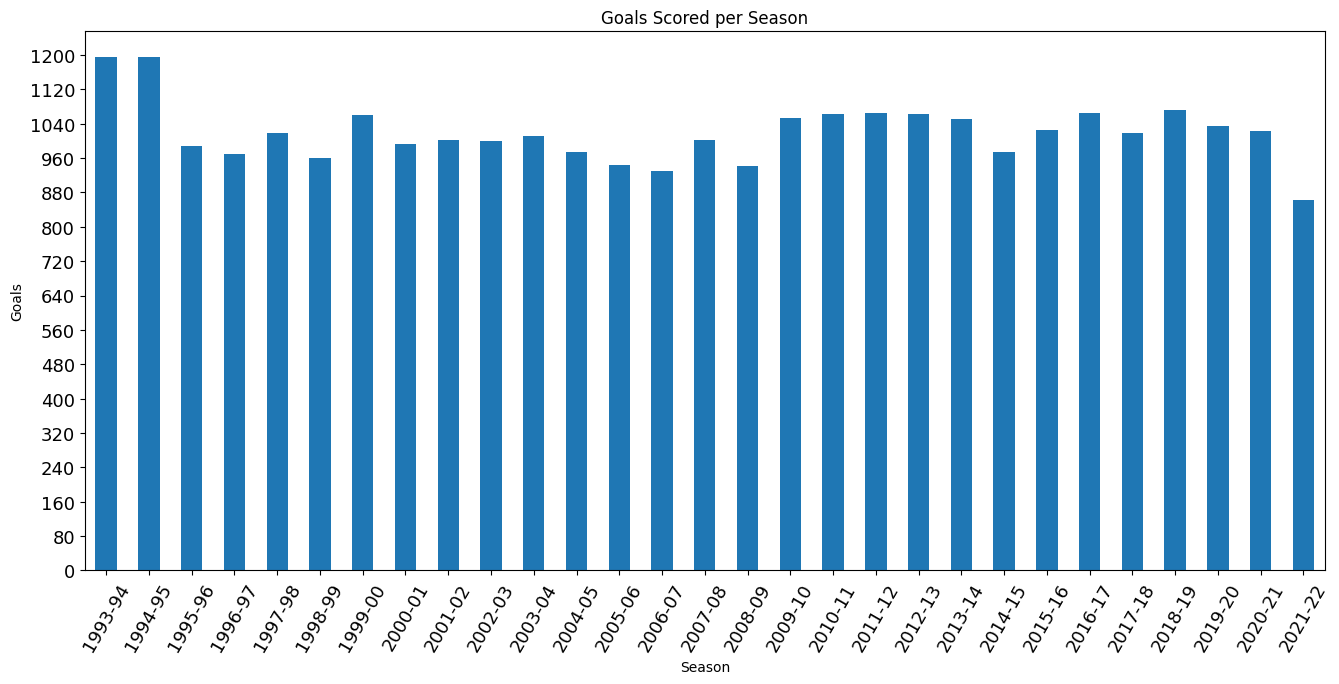

In [12]:
data['Total_Match_Goals'] = data['FTHG'] + data['FTAG']

data.groupby('Season')['Total_Match_Goals'].sum().plot(kind='bar',fontsize=13,figsize=(16,7),yticks=np.arange(0,1201,80)) 

plt.title("Goals Scored per Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.xticks(rotation=60)
plt.show()

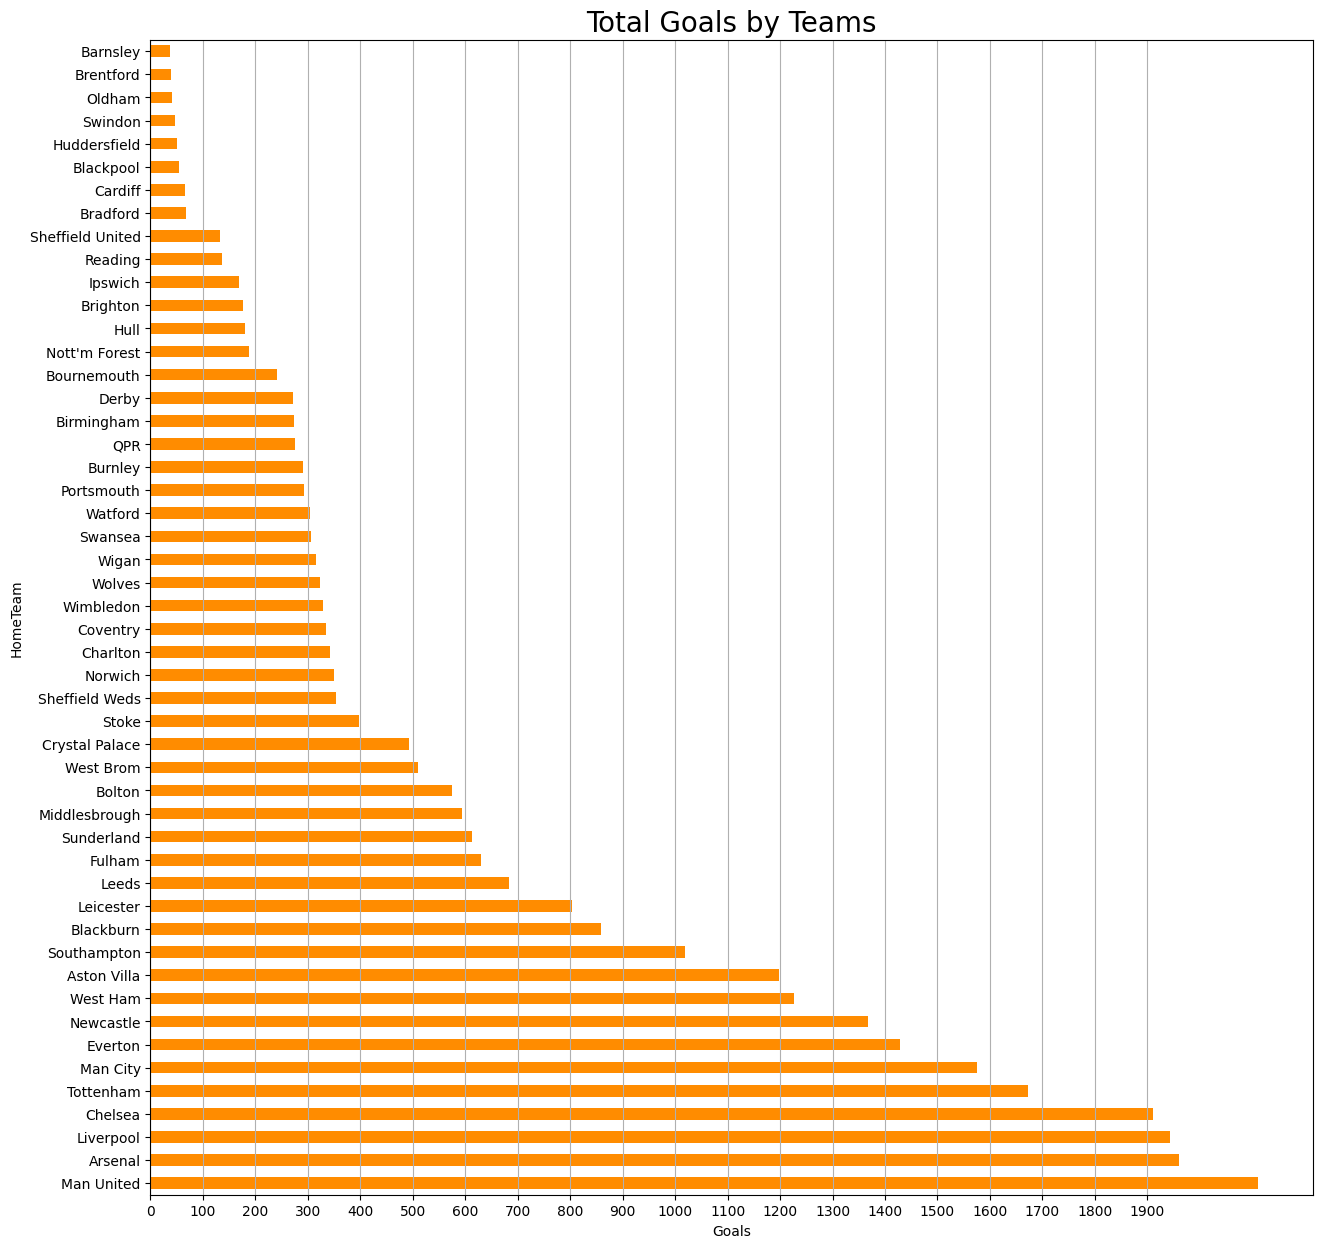

In [13]:
tot_g = data.groupby('HomeTeam')['FTHG'].sum() + data.groupby('AwayTeam')['FTAG'].sum()
tot_g.sort_values(ascending=False).plot(kind='barh',figsize=(15,15),xticks=np.arange(0,1901,100),color='darkorange')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Total Goals by Teams",fontsize=20)
plt.show()

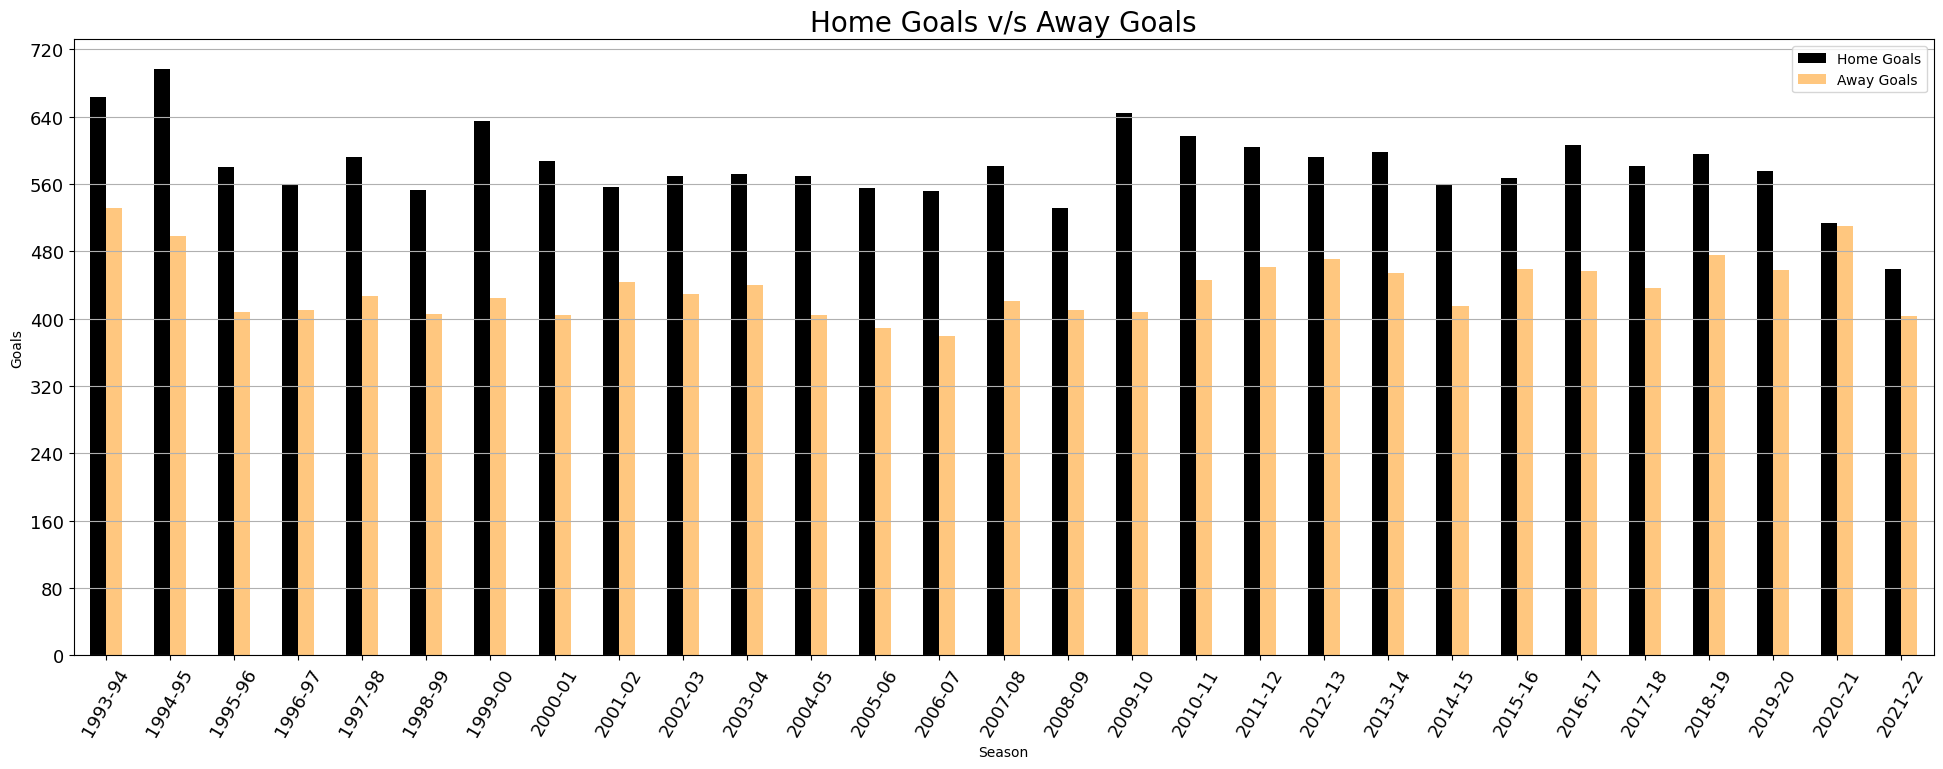

In [14]:
data.groupby('Season')[['FTHG','FTAG']].sum().plot(kind='bar',fontsize=13,figsize=(24,8),yticks=np.arange(0,721,80),colormap='copper')
plt.grid(axis='y')
plt.ylabel('Goals')
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals v/s Away Goals",fontsize=20)
plt.xticks(rotation=60)
plt.show()

Home Games Stats

In [15]:
hp = data.groupby(['Season','HomeTeam'])['FTR'].count().rename("HP")
hw = data[data['FTR'] =='H'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HW")
hl = data[data['FTR'] =='A'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HL")
hd = data[data['FTR'] =='D'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HD")
home_games=pd.concat([hp,hw,hl,hd],axis=1).reset_index()
home_games.fillna(0,inplace=True)
home_games[['HP','HL','HD','HW']]=home_games[['HP','HL','HD','HW']].astype(int)


#Getting Total Goals scored and conceded by Home Teams per Season (Full Time and Half Time)
home_score=data.groupby(['Season','HomeTeam'])['FTAG','FTHG','HTAG','HTHG'].sum().astype(int).reset_index()
home_score.rename(columns={'FTHG':'HG For','FTAG':'HG Against','HTAG':'HG For(Half Time)','HTHG':'HG Against(Half Time)'},inplace=True)

home_df=pd.merge(left=home_games,right=home_score,on=['Season','HomeTeam'],how='left')

C:\Users\DELL Precision M7510\AppData\Local\Temp\ipykernel_27084\959417091.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home_score=data.groupby(['Season','HomeTeam'])['FTAG','FTHG','HTAG','HTHG'].sum().astype(int).reset_index()


Away Games Stats

In [16]:
ap = data.groupby(['Season','AwayTeam'])['FTR'].count().rename("AP")
aw = data[data['FTR'] =='A'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AW")
al = data[data['FTR'] =='H'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AL")
ad = data[data['FTR'] =='D'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AD")
away_games=pd.concat([ap,aw,al,ad],axis=1).reset_index()
away_games.fillna(0,inplace=True)   ##NaN comes where theere are 0 games as groupby misses that entry
away_games[['AP','AL','AD','AW']]=away_games[['AP','AL','AD','AW']].astype(int)


#Getting Total Goals scored and conceded by Away Teams per Season (Full Time and Half Time)
away_score=data.groupby(['Season','AwayTeam'])['FTAG','FTHG','HTAG','HTHG'].sum().astype(int).reset_index()
away_score.rename(columns={'FTHG':'AG Against','FTAG':'AG For','HTAG':'AG For(Half Time)','HTHG':'AG Against(Half Time)'},inplace=True)

away_df=pd.merge(left=away_games,right=away_score,on=['Season','AwayTeam'],how='left')

C:\Users\DELL Precision M7510\AppData\Local\Temp\ipykernel_27084\3163169389.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away_score=data.groupby(['Season','AwayTeam'])['FTAG','FTHG','HTAG','HTHG'].sum().astype(int).reset_index()


In [17]:
pt_table = pd.merge(left=home_df,right=away_df,left_on=['Season','HomeTeam'],right_on=['Season','AwayTeam']).drop(['AwayTeam'],axis=1)
pt_table.rename(columns={'HomeTeam':'Team'},inplace=True)
pt_table['Total Wins'] = pt_table['HW'] + pt_table['AW']
pt_table['Total Loss'] = pt_table['HL'] + pt_table['AL']
pt_table['Total Draw'] = pt_table['HD'] + pt_table['AD']
pt_table['GF'] = pt_table['HG For'] + pt_table['AG For']
pt_table['GA'] = pt_table['HG Against'] + pt_table['AG Against']
pt_table['GD'] = pt_table['GF'] - pt_table['GA']
pt_table['Total_Points'] = 3*pt_table['Total Wins'] + pt_table['Total Draw']  ## 3 Points for a Win and 1 Point for a Draw.


In [18]:
fig = px.scatter(pt_table, x="Season", y="GD", color="Team",hover_name="Team",size="Total_Points",template='plotly',
                color_discrete_sequence=px.colors.cyclical.IceFire,
                 labels ={'GD': 'Goal Difference'},
                 title="Goal Difference per Season with Total Points reflected by the size")

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=20,
    type='category'
)


fig.show()

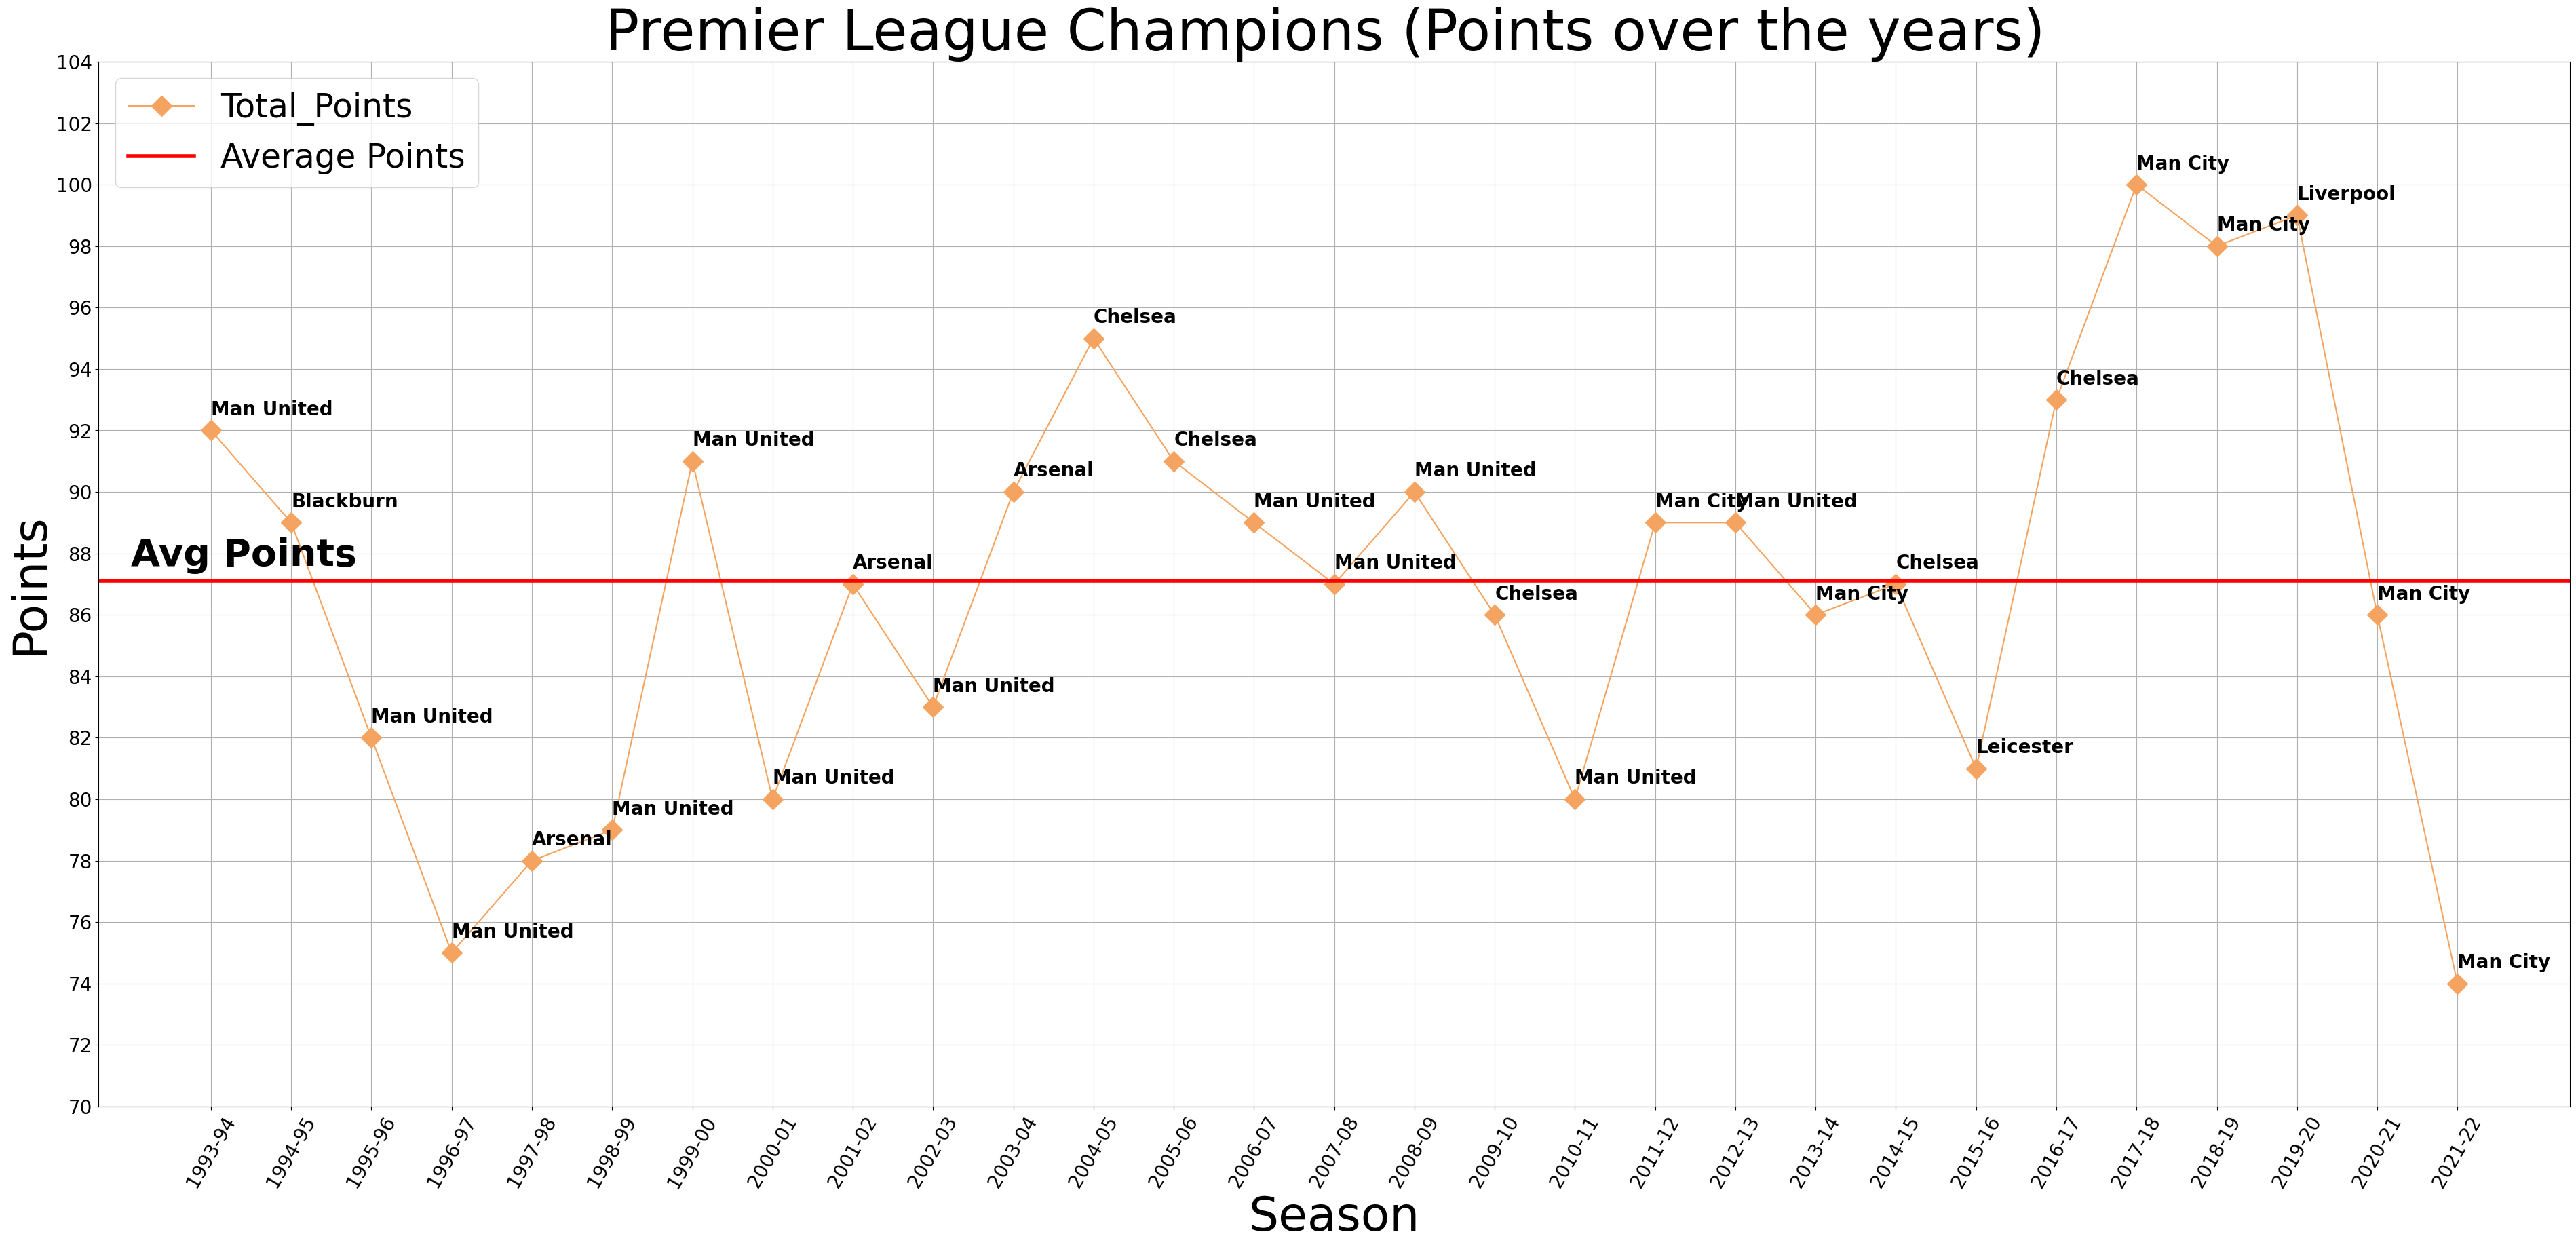

In [19]:
pt_table['Rank']= pt_table.groupby('Season')['Total_Points'].rank(method='min',ascending=False)
pt_table['fin'] = pt_table.groupby(['Season','Rank'])['GD'].rank(method='first',ascending=False)  ## If points are same, use goal difference
pt_table['Rank']=np.where((pt_table['fin'] > 1),(pt_table['Rank']+pt_table['fin'] - 1),pt_table['Rank'])
pt_table.drop('fin',axis=1,inplace=True)

top = pt_table[(pt_table['Rank']==1)]
top.set_index('Season',drop=True,inplace=True)
top = top.reset_index() ##set and reset done becuase otherwise it was showing irregular spaces in x axis of the plot

ax = top.plot(kind='line',color='sandybrown',y='Total_Points',grid=True,figsize=(47,20),label='Total_Points',linestyle='-',marker='D',markevery=1,markersize=15, fillstyle='full',markerfacecolor='sandybrown')
plt.axhline(y=top['Total_Points'].mean(),color='red',label='Average Points',linewidth=4)
plt.yticks(np.arange(70,105,2),fontsize=20)
plt.annotate('Avg Points',(-1,top['Total_Points'].mean() + 0.5),fontsize = 40,fontweight='bold')
a=0
for index,row in top.iterrows():
    b=row.Total_Points
    plt.annotate(row.Team,(a,b+.5),fontsize=20,fontweight='bold')
    a=a+1
plt.xlabel('Season',fontsize=50)
plt.ylabel('Points',fontsize=50)
plt.title('Premier League Champions (Points over the years) ',fontsize=60)
plt.legend(loc=2,fontsize=35)
plt.xticks(top.index,rotation=60,fontsize=20)
ax.set_xticklabels(top['Season'])
plt.show()
